# Simpsons Episodes: Exploratory Data Analysis

In this project I want to put focus on the episode information and viewership numbers for all aired episodes of <b style="color:#FFC300 ">The Simpsons</b>. This TV show is one of my favorite despite the fact that I haven't watched most episodes of them:) <br>
Nevertheless, I'm fascinated to explore some data and gain insights about the episodes so that I can use this info for choosing which episodes can be interesting for me.<br>
Link to the dataset: https://www.kaggle.com/datasets/jonbown/simpsons-episodes-2016/data?select=simpsons_episodes.csv

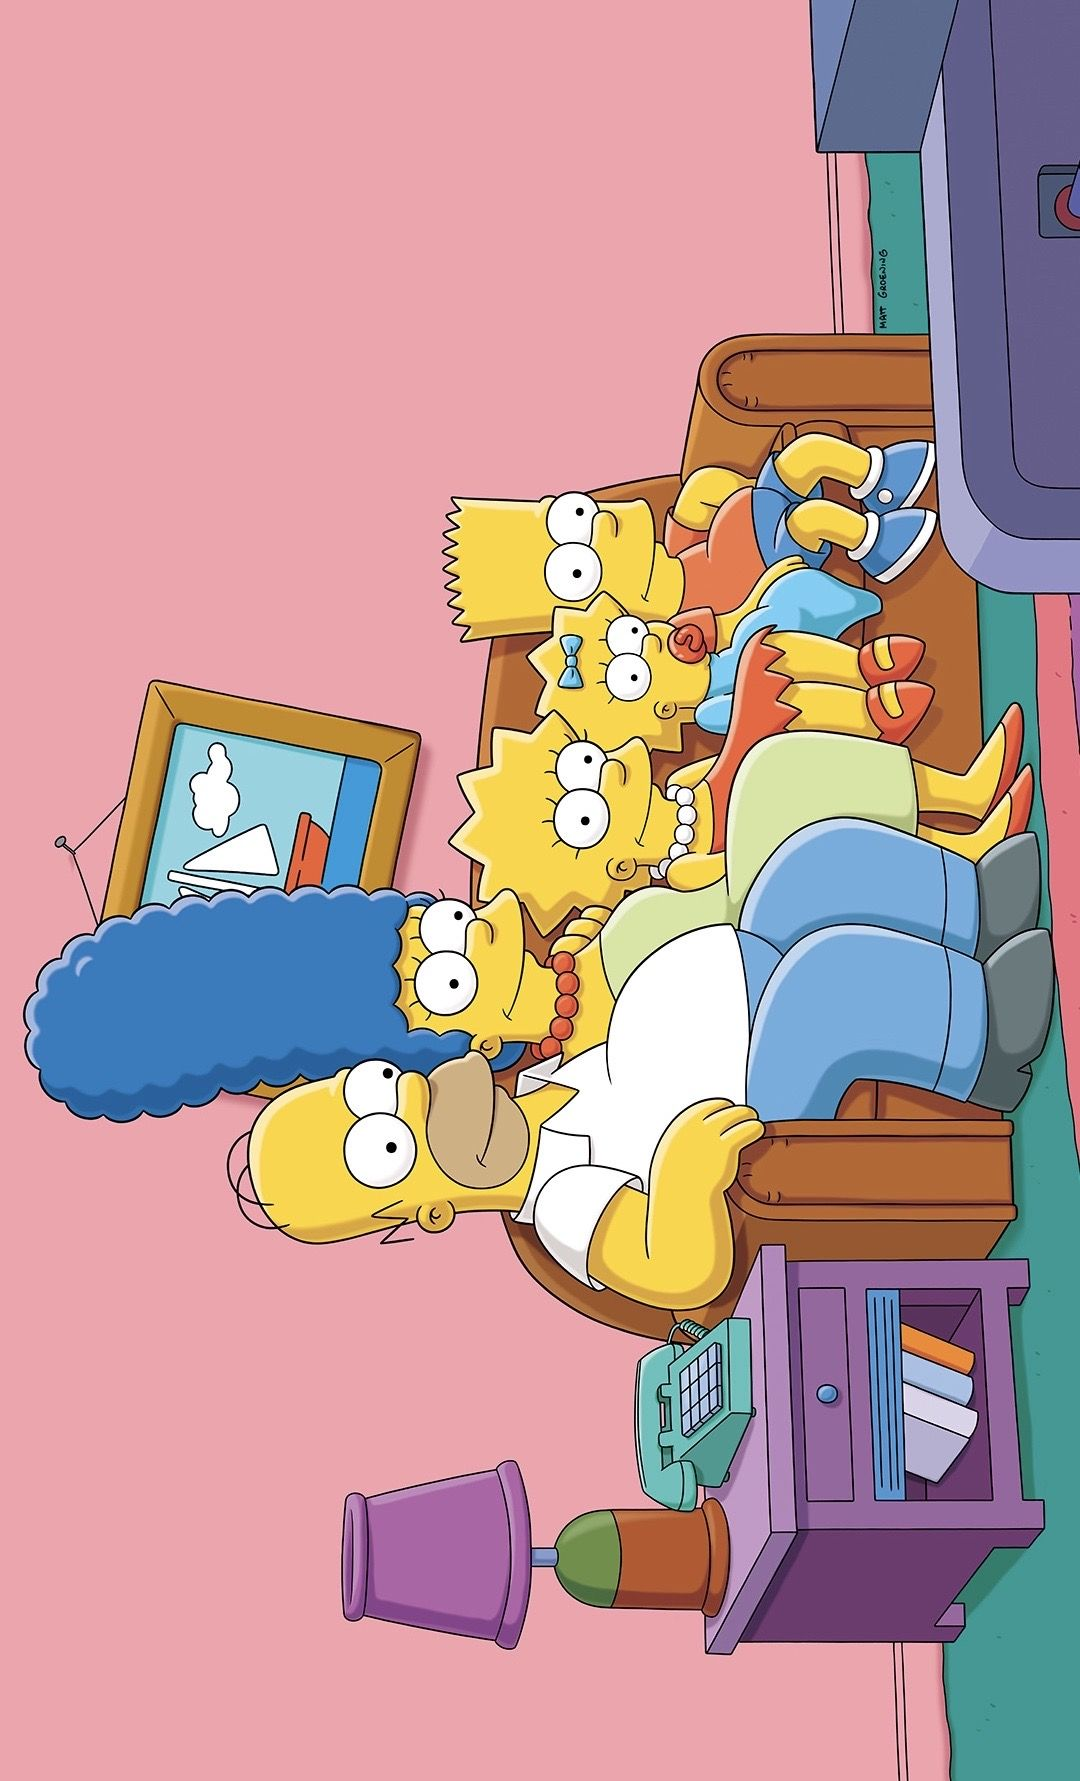

## 1. Loading the data & importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I will load it from my local disk
df = pd.read_csv('D:\Datasets/simpsons/simpsons_episodes.csv')

In [3]:
# let's see the dimension of the dataframe
df.shape

(747, 14)

We have 14 columns and 747 recordings in the dataset. Let's see how it looks.

In [4]:
df.head(6)

id                              title  \
0   0  Simpsons Roasting on an Open Fire   
1   1                    Bart the Genius   
2   2                    Homer's Odyssey   
3   3      There's No Disgrace Like Home   
4   4                   Bart the General   
5   5                       Moaning Lisa   

                                         description original_air_date  \
0  Homer is forced to become a department store S...        1989-12-17   
1  Bart ends up at a school for gifted children a...        1990-01-14   
2  After losing his job, Homer contemplates endin...        1990-01-21   
3  After being embarrassed by the rest of the fam...        1990-01-28   
4  After being beaten up by Nelson Muntz one too ...        1990-02-04   
5  A depressed Lisa's spirit is lifted when she m...        1990-02-11   

  production_code                     directed_by  \
0            7G08                 David Silverman   
1            7G02                 David Silverman   
2            7G03                      Wes Archer   
3            7G04  Gregg Vanzo & Kent Butterworth   
4            7G05                 David Silverman   
5            7G06                      Wes Archer   

                       written_by  season  number_in_season  number_in_series  \
0                       Mimi Pond       1                 1                 1   
1                       Jon Vitti       1                 2                 2   
2  Jay Kogen & Wallace Wolodarsky       1                 3                 3   
3            Al Jean & Mike Reiss       1                 4                 4   
4               John Swartzwelder       1                 5                 5   
5            Al Jean & Mike Reiss       1                 6                 6   

   us_viewers_in_millions  imdb_rating  tmdb_rating  tmdb_vote_count  
0                    26.7          8.1        6.921              101  
1                    24.5          7.7        7.400               62  
2                    27.5          7.3        6.500               58  
3                    20.2          7.7        7.200               52  
4                    27.1          7.9        6.900               53  
5                    27.4          7.6        7.200               50

## 2. Getting acquainted with data

Let's find out the columns in the dataset:

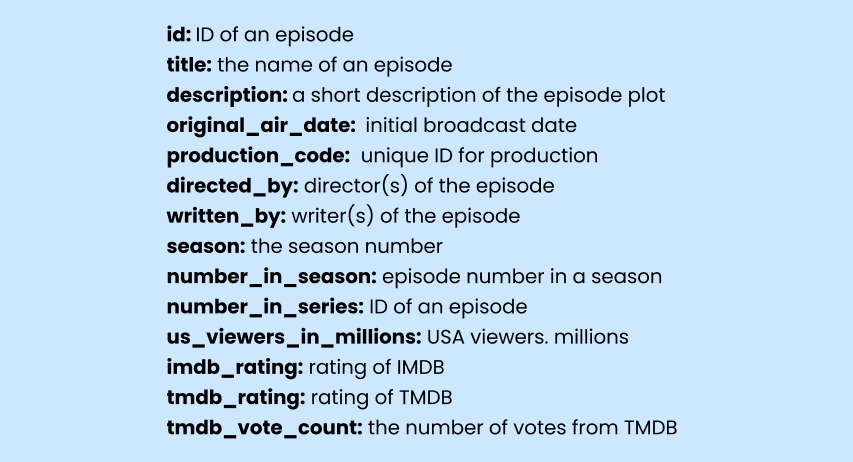

There are 14 columns. Let's find out more about these columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      747 non-null    int64  
 1   title                   747 non-null    object 
 2   description             747 non-null    object 
 3   original_air_date       747 non-null    object 
 4   production_code         747 non-null    object 
 5   directed_by             747 non-null    object 
 6   written_by              747 non-null    object 
 7   season                  747 non-null    int64  
 8   number_in_season        747 non-null    int64  
 9   number_in_series        747 non-null    int64  
 10  us_viewers_in_millions  746 non-null    float64
 11  imdb_rating             747 non-null    float64
 12  tmdb_rating             747 non-null    float64
 13  tmdb_vote_count         747 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory 

The dataset consists of:
- 8 numerical parameters
- 6 non-numerical parameters. <br>

As we've seen earlier, non-numerical parameters contain text information.

In [6]:
# descriptive statistics for numerical parameters
df.describe()

id      season  number_in_season  number_in_series  \
count  747.000000  747.000000        747.000000        747.000000   
mean   373.000000   17.444444         11.610442        374.325301   
std    215.784615    9.734715          6.497023        216.271060   
min      0.000000    1.000000          1.000000          1.000000   
25%    186.500000    9.000000          6.000000        187.500000   
50%    373.000000   17.000000         12.000000        374.000000   
75%    559.500000   26.000000         17.000000        560.500000   
max    746.000000   34.000000         25.000000        750.000000   

       us_viewers_in_millions  imdb_rating  tmdb_rating  tmdb_vote_count  
count              746.000000   747.000000   747.000000       747.000000  
mean                10.384531     7.150870     6.379029        18.070950  
std                  6.963214     0.818934     0.879565         8.874704  
min                  0.770000     4.000000     0.000000         1.000000  
25%                  4.755000     6.600000     5.800000        14.000000  
50%                  9.015000     7.000000     6.300000        17.000000  
75%                 14.837500     7.700000     7.000000        23.000000  
max                 33.600000     9.300000     8.600000       101.000000

#### Checking null values

In [7]:
df[df.isnull().any(axis=1)]

id                           title  \
422  422  Double, Double, Boy in Trouble   

                                           description original_air_date  \
422  Bart trades lives with his multi-millionaire l...        2008-10-26   

    production_code  directed_by     written_by  season  number_in_season  \
422          KABF14  Nancy Kruse  Bill Odenkirk      20                 3   

     number_in_series  us_viewers_in_millions  imdb_rating  tmdb_rating  \
422               423                     NaN          6.9          5.8   

     tmdb_vote_count  
422               20

Since it's only 1 row with null data, I will just remove it from the whole dataset.

In [8]:
df.dropna(inplace=True)

We can see that columns <b>id</b> and <b>number_in_series</b> seem to be similar: id represents the id of the episode and is the same as the row index, so we can just delete this column. The parameter <b>number_in_series</b> represents chronological order of all epsiodes, I will keep it.

In [9]:
df.drop(columns=['id'], inplace=True)

In [10]:
df.head(3)

title  \
0  Simpsons Roasting on an Open Fire   
1                    Bart the Genius   
2                    Homer's Odyssey   

                                         description original_air_date  \
0  Homer is forced to become a department store S...        1989-12-17   
1  Bart ends up at a school for gifted children a...        1990-01-14   
2  After losing his job, Homer contemplates endin...        1990-01-21   

  production_code      directed_by                      written_by  season  \
0            7G08  David Silverman                       Mimi Pond       1   
1            7G02  David Silverman                       Jon Vitti       1   
2            7G03       Wes Archer  Jay Kogen & Wallace Wolodarsky       1   

   number_in_season  number_in_series  us_viewers_in_millions  imdb_rating  \
0                 1                 1                    26.7          8.1   
1                 2                 2                    24.5          7.7   
2                 3                 3                    27.5          7.3   

   tmdb_rating  tmdb_vote_count  
0        6.921              101  
1        7.400               62  
2        6.500               58

## 3. EDA

<b>IMDb</b> (Internet Movie Database) and <b>TMDb</b> (The Movie Database) are both popular online databases providing information about movies and TV shows.IMDb ratings are primarily based on user reviews and critic scores, whereas TMDb relies on user ratings and votes to calculate its ratings.

### <b style="color:#C33EE5">1. The most popular episodes by each rating</b>

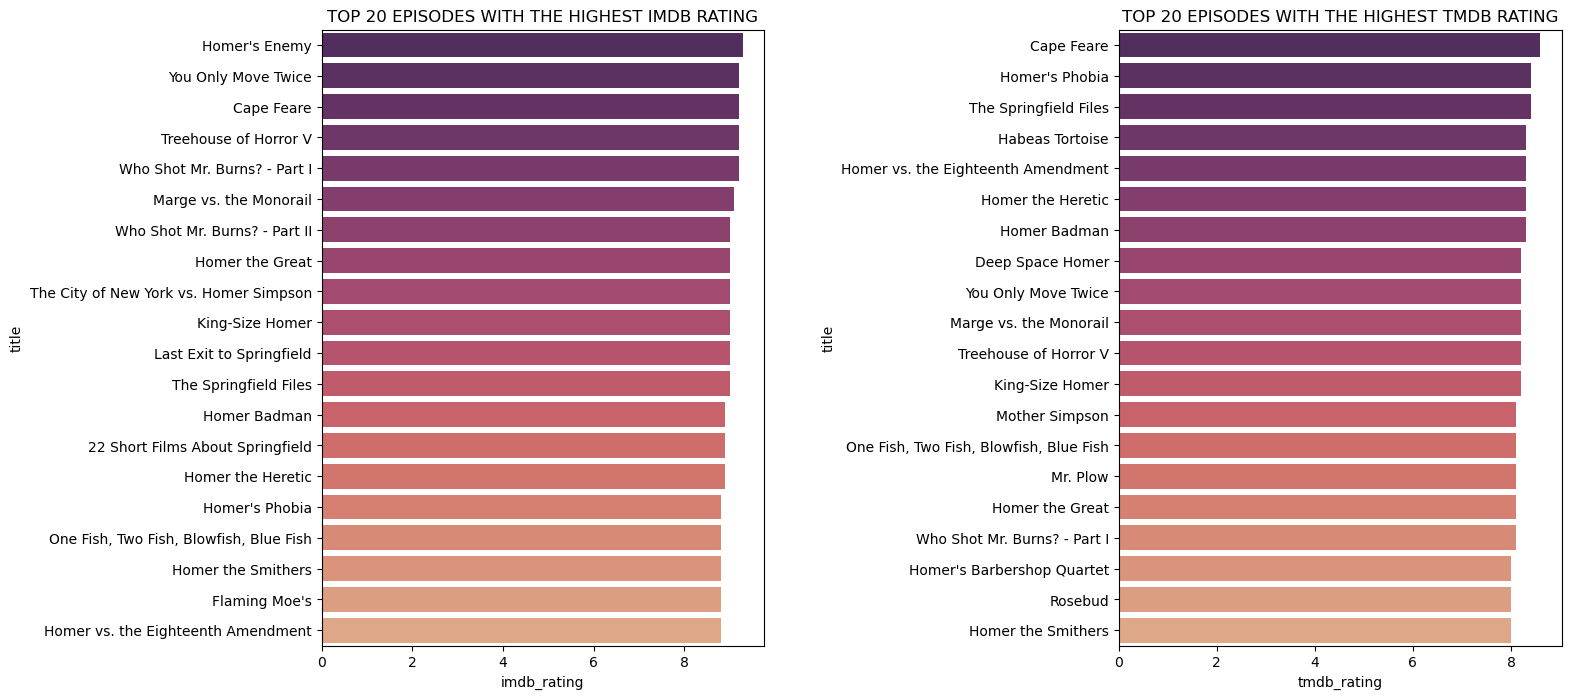

In [11]:
top_episodes_imdb = df.sort_values(by=['imdb_rating'], ascending=False)
top_episodes_tmdb = df.sort_values(by=['tmdb_rating'], ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.8)
color_palette =sns.color_palette('flare', n_colors=20)[::-1]
sns.barplot(x=top_episodes_imdb.imdb_rating[:20], y=top_episodes_imdb.title[:20], ax=axes[0], palette=color_palette)
sns.barplot(x=top_episodes_tmdb.tmdb_rating[:20], y=top_episodes_tmdb.title[:20], ax=axes[1], palette=color_palette)
axes[0].set_title('TOP 20 EPISODES WITH THE HIGHEST IMDB RATING')
axes[1].set_title('TOP 20 EPISODES WITH THE HIGHEST TMDB RATING')
plt.show()

We can see that some top-20 episodes are both in IMDb and TMDb ratings. But let's check the difference in these values.

In [12]:
imdb_top_list = top_episodes_imdb[:20]['title'].to_list()
tmdb_top_list = top_episodes_tmdb[:20]['title'].to_list()
common_top_episodes = set(imdb_top_list) & set(tmdb_top_list)

In [13]:
melted_df = pd.melt(df[['title', 'imdb_rating', 'tmdb_rating']], 
                    id_vars='title', var_name='rating_source', value_name='rating')
df2 = pd.DataFrame(columns=melted_df.columns)

In [14]:
for i in common_top_episodes:
    rows = melted_df[melted_df['title'] == i]
    df2 = pd.concat([df2, rows], ignore_index=True)

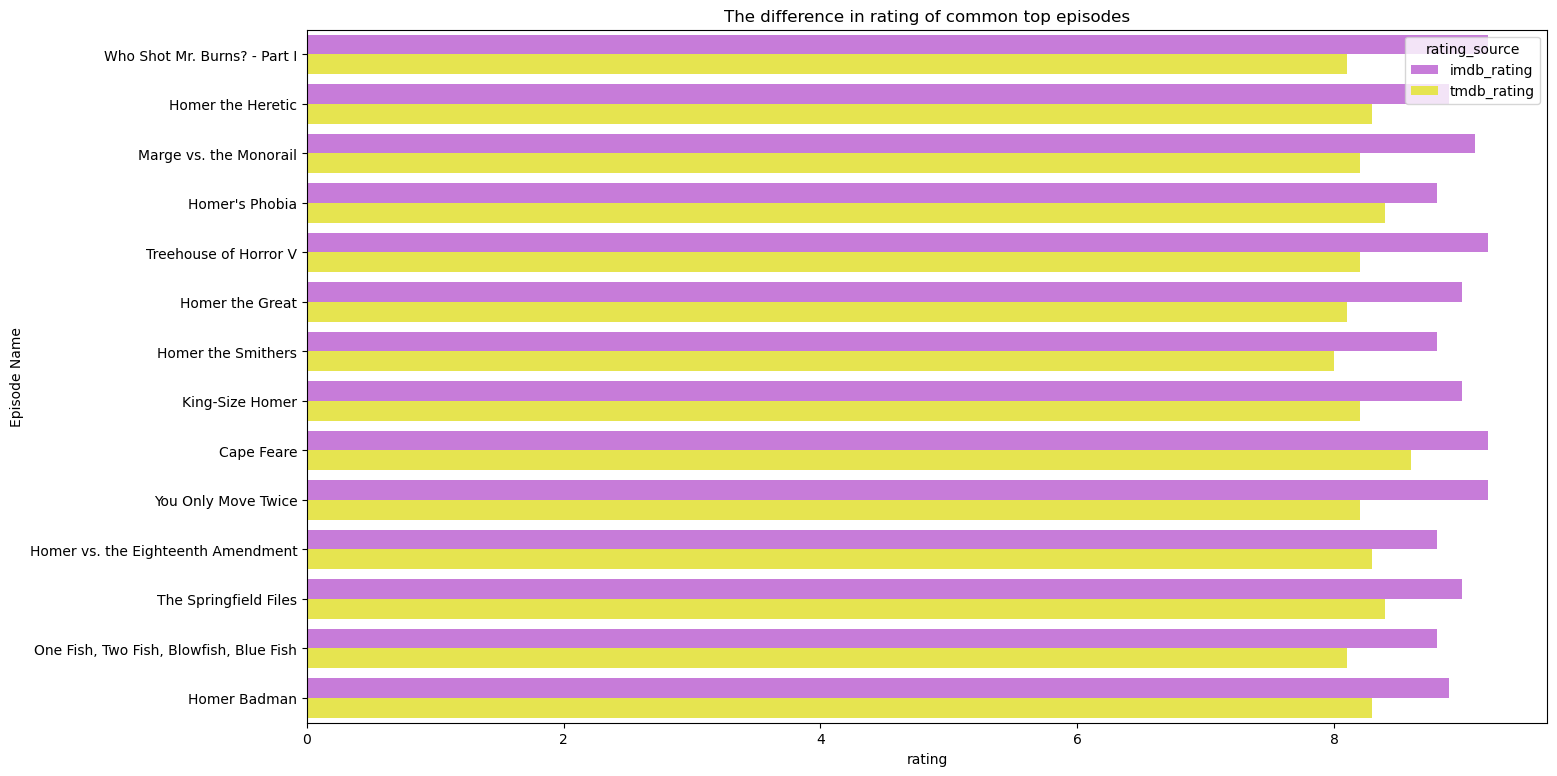

In [15]:
plt.figure(figsize=(16,9))
sns.barplot(y='title', x='rating', hue='rating_source', data=df2, palette=['#D06CE9', '#FFFC37'])
plt.ylabel('Episode Name')
plt.title('The difference in rating of common top episodes')
plt.show()

Interestingly, IMDb rating is a bit higher than TMDb in all common top episodes. As known, IMDb platform has more users and its database is bigger than TMDb.

### <b style="color: #C33EE5">2. The most viewed episodes in the USA</b>

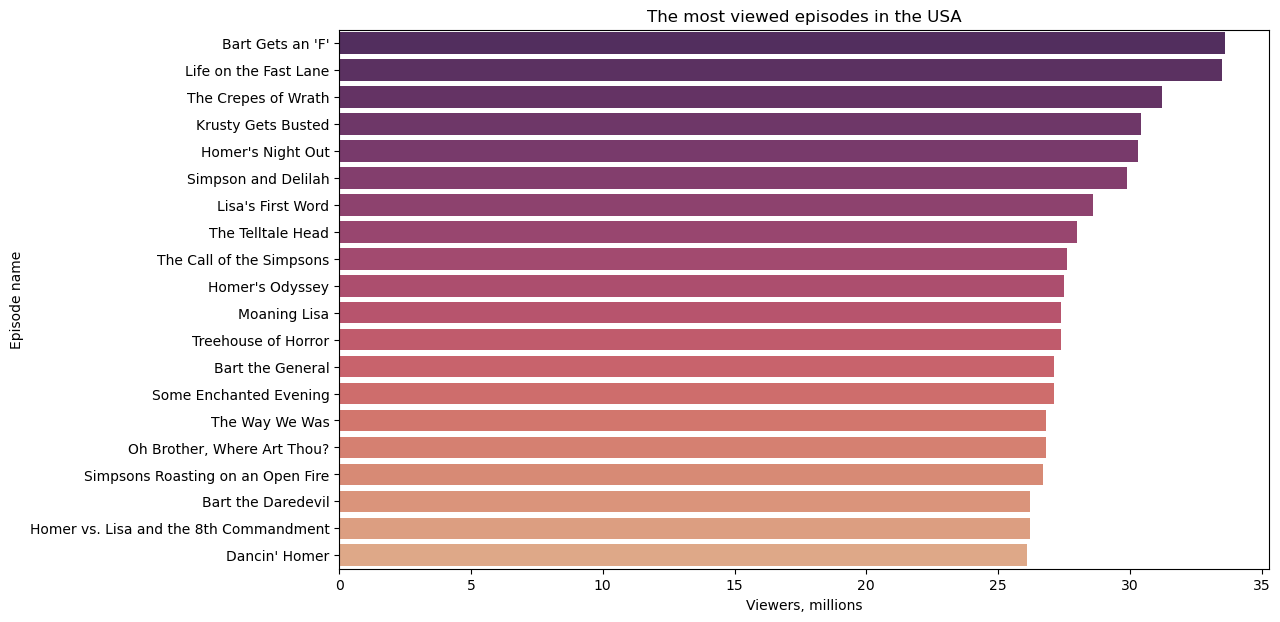

In [16]:
most_viewed_episodes = df.sort_values(by=['us_viewers_in_millions'], ascending=False)
plt.figure(figsize=(12,7))
plt.title('The most viewed episodes in the USA')
sns.barplot(x=most_viewed_episodes['us_viewers_in_millions'][:20], 
            y=most_viewed_episodes['title'][:20], palette = sns.color_palette('flare', n_colors=20)[::-1])
plt.xlabel('Viewers, millions')
plt.ylabel('Episode name')
plt.show()

Let's check if these episodes are in the top-20 IMDb rating:

In [17]:
top_and_most_viewed = set(top_episodes_imdb[:20]['title'].to_list()) & set(most_viewed_episodes[:20]['title'].to_list()) 
print("Yes,", len(top_and_most_viewed), 
      "episodes are in top-20.") if len(top_and_most_viewed) > 0 else print("No episode found in top-20.")

No episode found in top-20.


Seems to be unexpected that in the top-20 most viewed episodes we don't find any top-20 IMDb rating episode. Let's explore how these 2 parameters relate to each other.

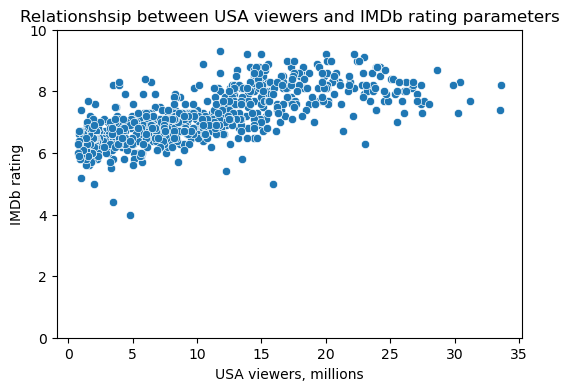

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x = df.us_viewers_in_millions.values, y = df.imdb_rating.values)
plt.xlabel("USA viewers, millions")
plt.ylabel("IMDb rating")
plt.title("Relationshsip between USA viewers and IMDb rating parameters")
plt.ylim(0, 10)
plt.show()

There is high correlation between these 2 parameters and it is completely understandable:  popular shows tend to attract more viewers, and if a show is well-received by a large audience, it is likely to receive higher IMDb ratings.<br>
<i><b>But why don't we see this correlation between the top-20 episodes?</i> <br>
Because 20 recordings are not enough for making right conclusions.

### <b style="color: #C33EE5">3. Exploring seasons with top episodes</b>

In [19]:
seasons_imdb = top_episodes_imdb[top_episodes_imdb.imdb_rating >= 8.5].season.value_counts()
percentage = round((seasons_imdb / seasons_imdb.values.sum()) * 100, 1)

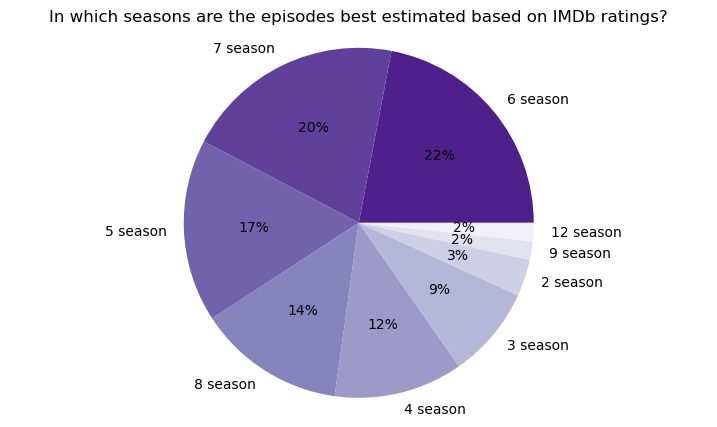

In [20]:
labels = [str(i) +' season' for i in percentage.index]
plt.figure(figsize=(9,5))
colors = sns.color_palette("Purples", n_colors = len(labels))[::-1]
plt.pie(percentage.values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('In which seasons are the episodes best estimated based on IMDb ratings?')
plt.axis('equal')
plt.show()

#### For TMDb rating

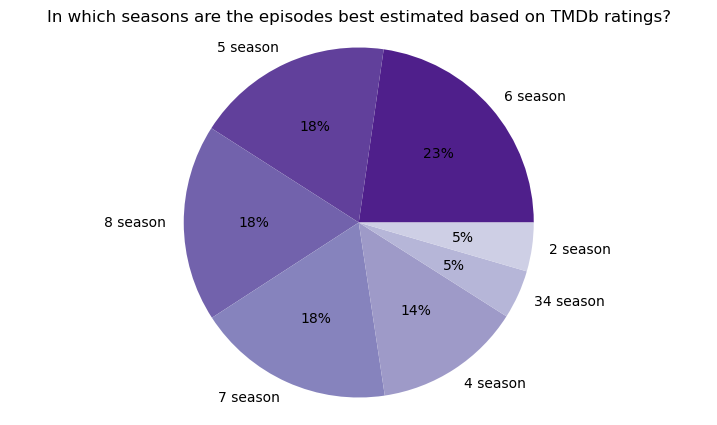

In [21]:
seasons_tmdb = top_episodes_tmdb[top_episodes_tmdb.tmdb_rating >= 8.0].season.value_counts()
percentage_tmdb = round((seasons_tmdb / seasons_tmdb.values.sum()) * 100, 1)
labels = [str(i) +' season' for i in percentage_tmdb.index]
plt.figure(figsize=(9, 5))
plt.pie(percentage_tmdb.values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('In which seasons are the episodes best estimated based on TMDb ratings?')
plt.axis('equal')
plt.show()

### <b style="color: #C33EE5"> 4. Getting more insights about seasons<b>

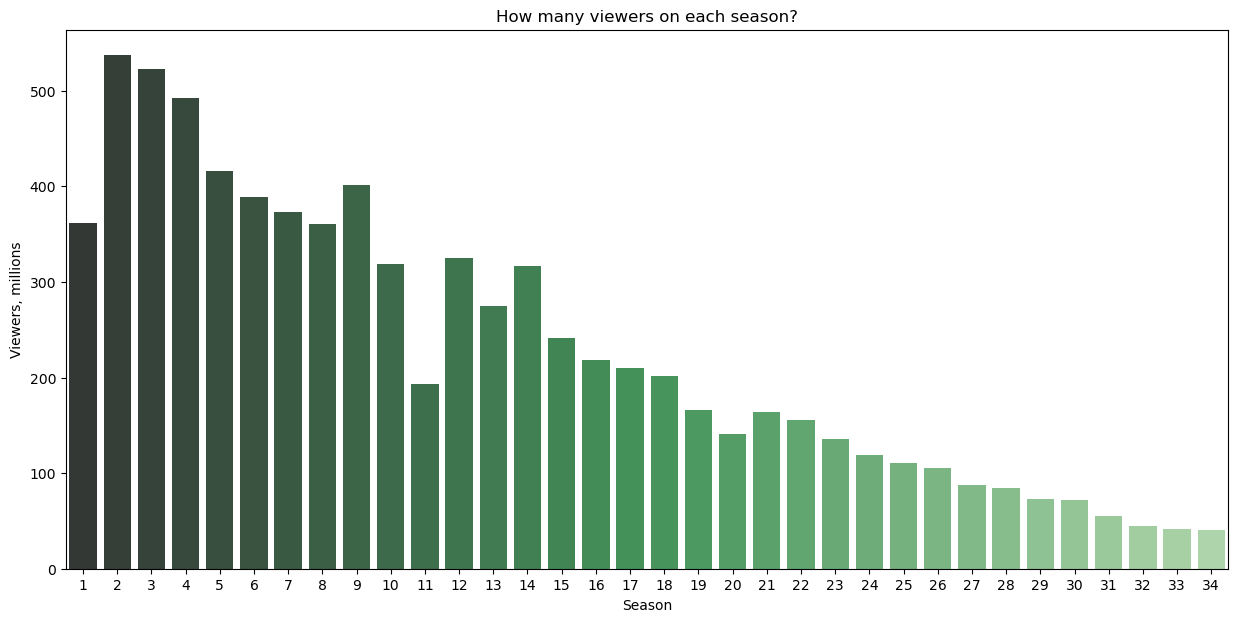

In [22]:
seasons = df.groupby(by=['season']).sum()
plt.figure(figsize=(15,7))
sns.color_palette("mako", as_cmap=True)
sns.barplot(x= seasons.index, y=seasons.us_viewers_in_millions.values,
            palette=sns.color_palette('Greens_d', len(seasons))[::-1])
plt.title('How many viewers on each season?')
plt.ylabel('Viewers, millions')
plt.xlabel('Season')
plt.show()

As we see, that number of viewers was constantly reducing with every new season.

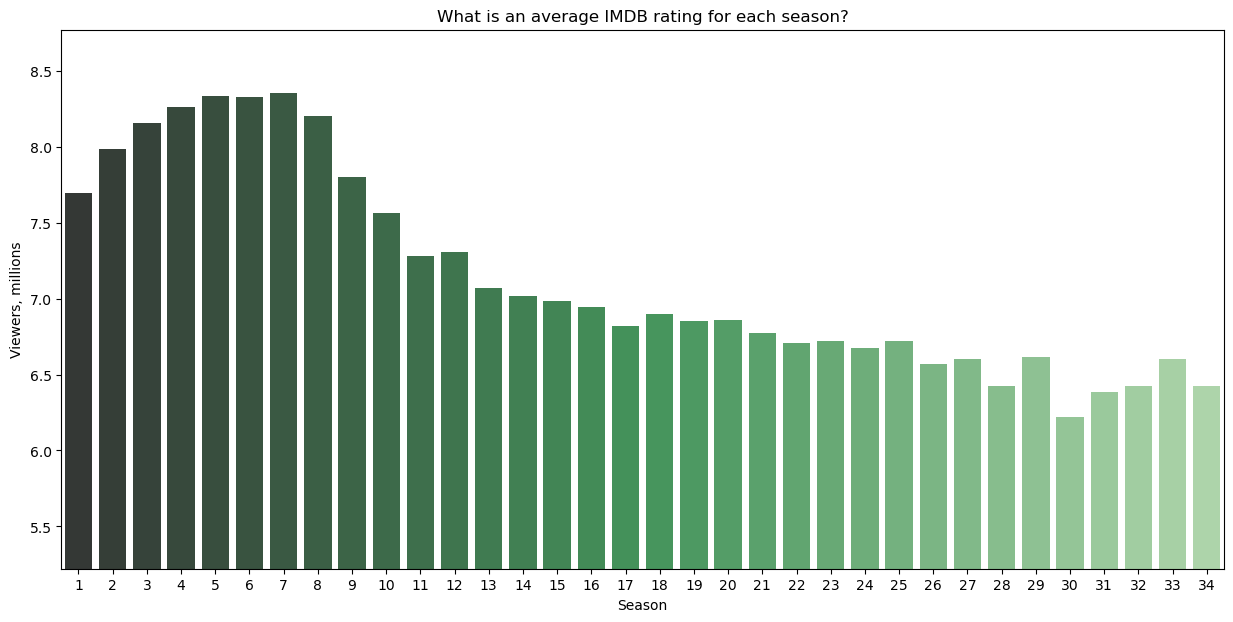

In [23]:
plt.figure(figsize=(15,7))
avg_rating = df.groupby(by=['season'])['imdb_rating'].mean()
sns.barplot(x = avg_rating.index, y = avg_rating.values,
            palette=sns.color_palette('Greens_d', len(seasons))[::-1])
plt.title('What is an average IMDB rating for each season?')
plt.ylabel('Viewers, millions')
plt.xlabel('Season')
plt.ylim(avg_rating.min()-1)
plt.show()

### <b style="color: #C33EE5">5. Checking correlation & parameters distributions</b>

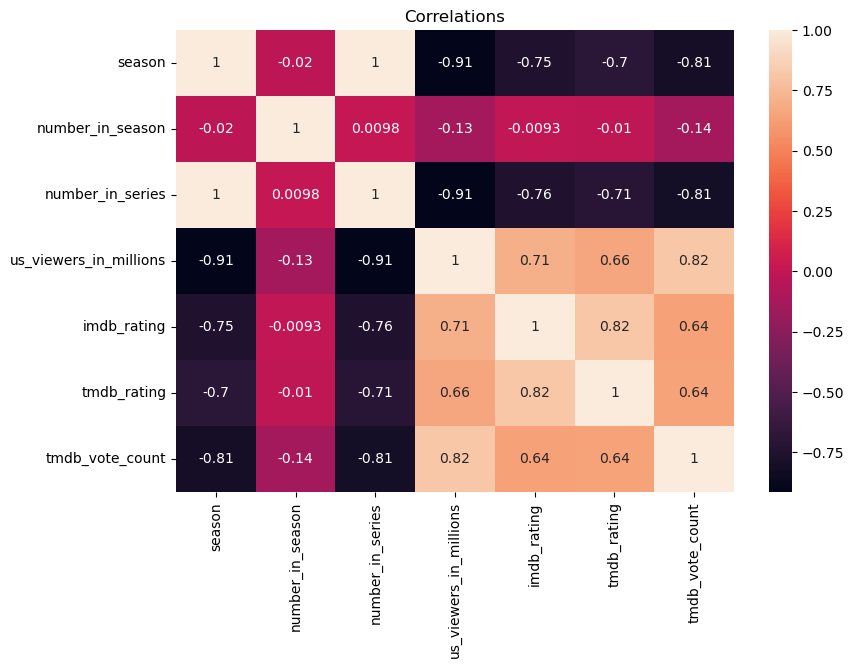

In [28]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlations')
plt.show()

Let's explain some correlations values:

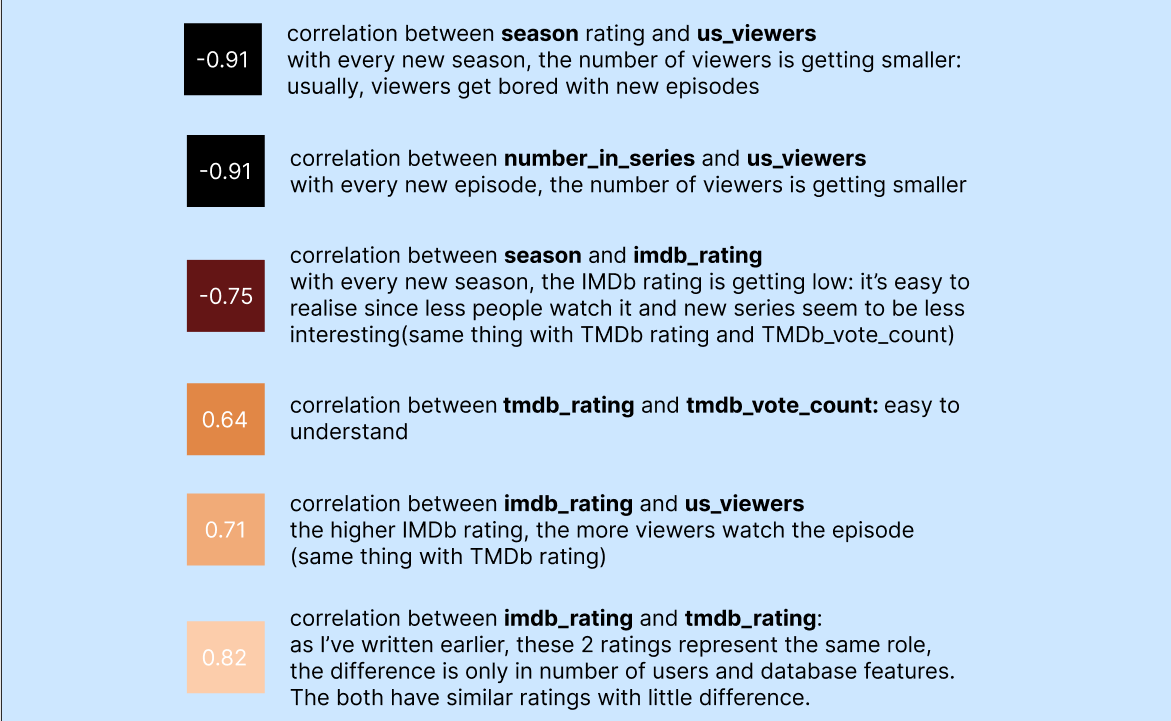

Let's also check some distributions.

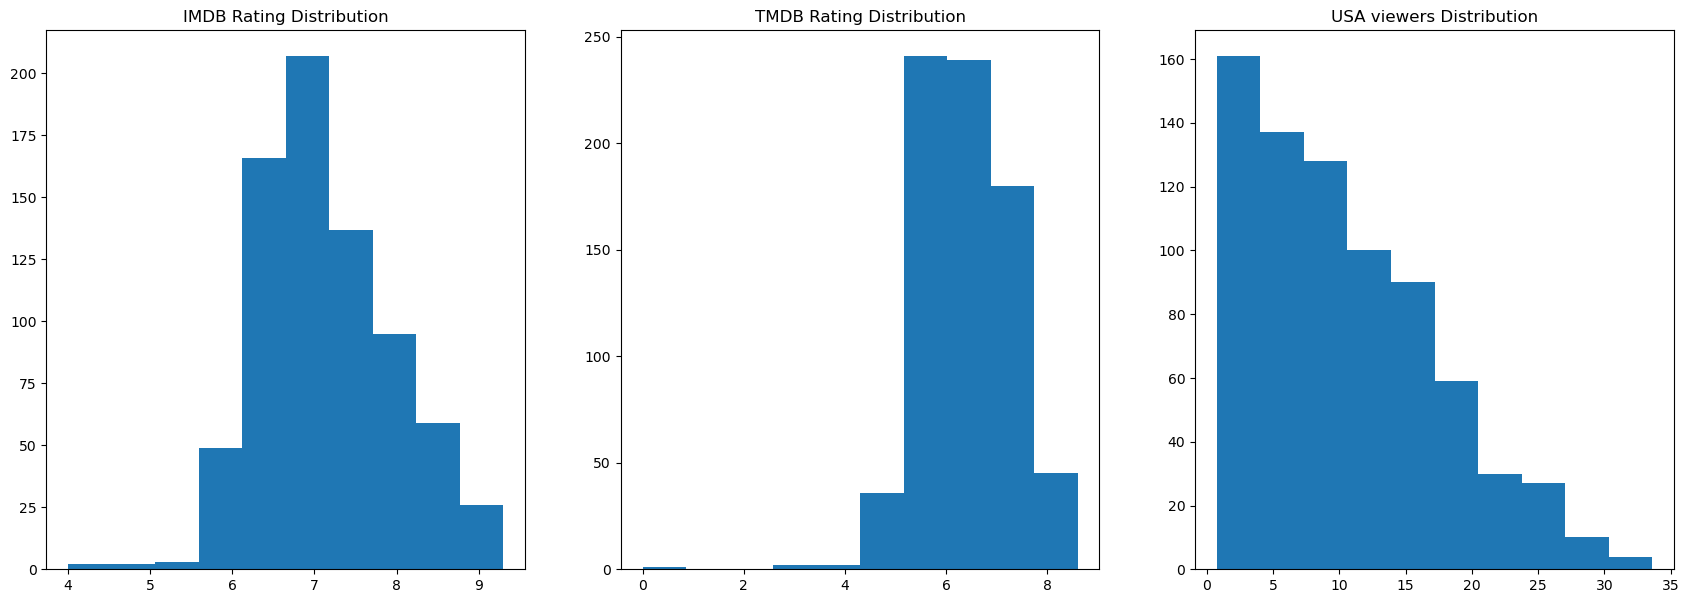

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(21,7))
axes[0].hist(df.imdb_rating)
axes[1].hist(df.tmdb_rating)
axes[2].hist(df.us_viewers_in_millions)
axes[0].set_title('IMDB Rating Distribution')
axes[1].set_title('TMDB Rating Distribution')
axes[2].set_title('USA viewers Distribution')
plt.show()

### <b style="color: #C33EE5">6. Detecting outliers</b>

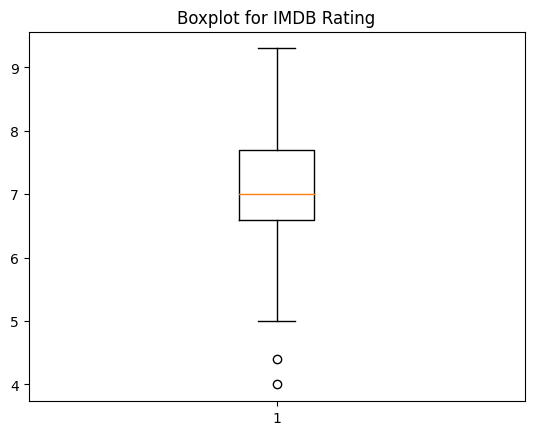

In [ ]:
plt.boxplot(df.imdb_rating)
plt.title('Boxplot for IMDB Rating')
plt.show()

In [ ]:
Q1 = df["imdb_rating"].quantile(0.25)
Q3 = df["imdb_rating"].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

We've detected 2 recordings that are potential outliers.

In [ ]:
df[(df.imdb_rating < Lower_Fence)]

title  \
507             Lisa Goes Gaga   
704  The Star of the Backstage   

                                           description original_air_date  \
507  After a desperate attempt by Lisa to become mo...        2012-05-20   
704  Marge stages a revival of a musical from high ...        2021-09-26   

    production_code        directed_by                 written_by  season  \
507          PABF14  Matthew Schofield                   Tim Long      23   
704          QABF17         Rob Oliver  Elisabeth Kiernan Averick      33   

     number_in_season  number_in_series  us_viewers_in_millions  imdb_rating  \
507                22               508                    4.82          4.0   
704                 1               707                    3.48          4.4   

     tmdb_rating  tmdb_vote_count  
507          4.9               19  
704          5.0                5

### <b style="color: #C33EE5">7. Additional EDA</b>

In [77]:
all_directors = df['directed_by'].to_list()
temp = []
for s in all_directors:
    temp.append(s.split(' & '))
directors = [director for sublist in temp for director in sublist]

In [83]:
dct = dict()
for director in directors:
    if director not in dct.keys():
        dct[director] = 1
    else:
        dct[director] +=1

In [105]:
sorted_dict = {director: value for director, value in sorted(dct.items(), key=lambda x: x[1], reverse=True)}

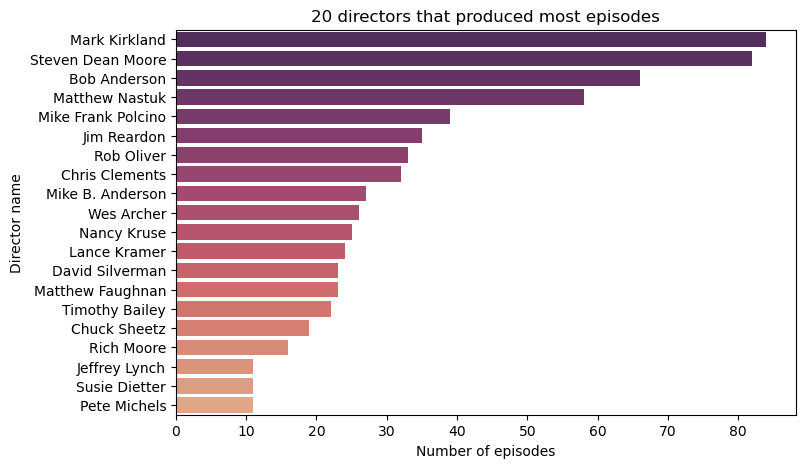

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(y = list(sorted_dict.keys())[:20], x=list(sorted_dict.values())[:20], 
            palette=sns.color_palette("flare", n_colors=20)[::-1])
plt.title('20 directors that produced most episodes')
plt.xlabel('Number of episodes')
plt.ylabel('Director name')
plt.show()

### <b style="color: #C33EE5">8. Building WordClouds</b>

In this final section I want analyze episodes' description in order to see which words are mostly used in top episodes. For this I will build several WordClouds. I will create it for both IMDb and TMDb ratings in order to see any difference or check some similarities.

In [137]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import tokenize
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))
punct = [".", "!", ",", ":", ";", "?"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
def build_word_cloud_rating(column_rating, rating):
    top = df[df[column_rating] == rating]
    text = ' '.join(top.description)
    clean_text = [w for w in tokenize.word_tokenize(text) if w not in (list(stop_words) + punct)]

    wc = WordCloud(width=800, height=800).generate(' '.join(clean_text))
    return wc

In [156]:
imdb_ratings = [round(i, 1) for i in np.arange(7.9, 9.3, 0.1).tolist()]

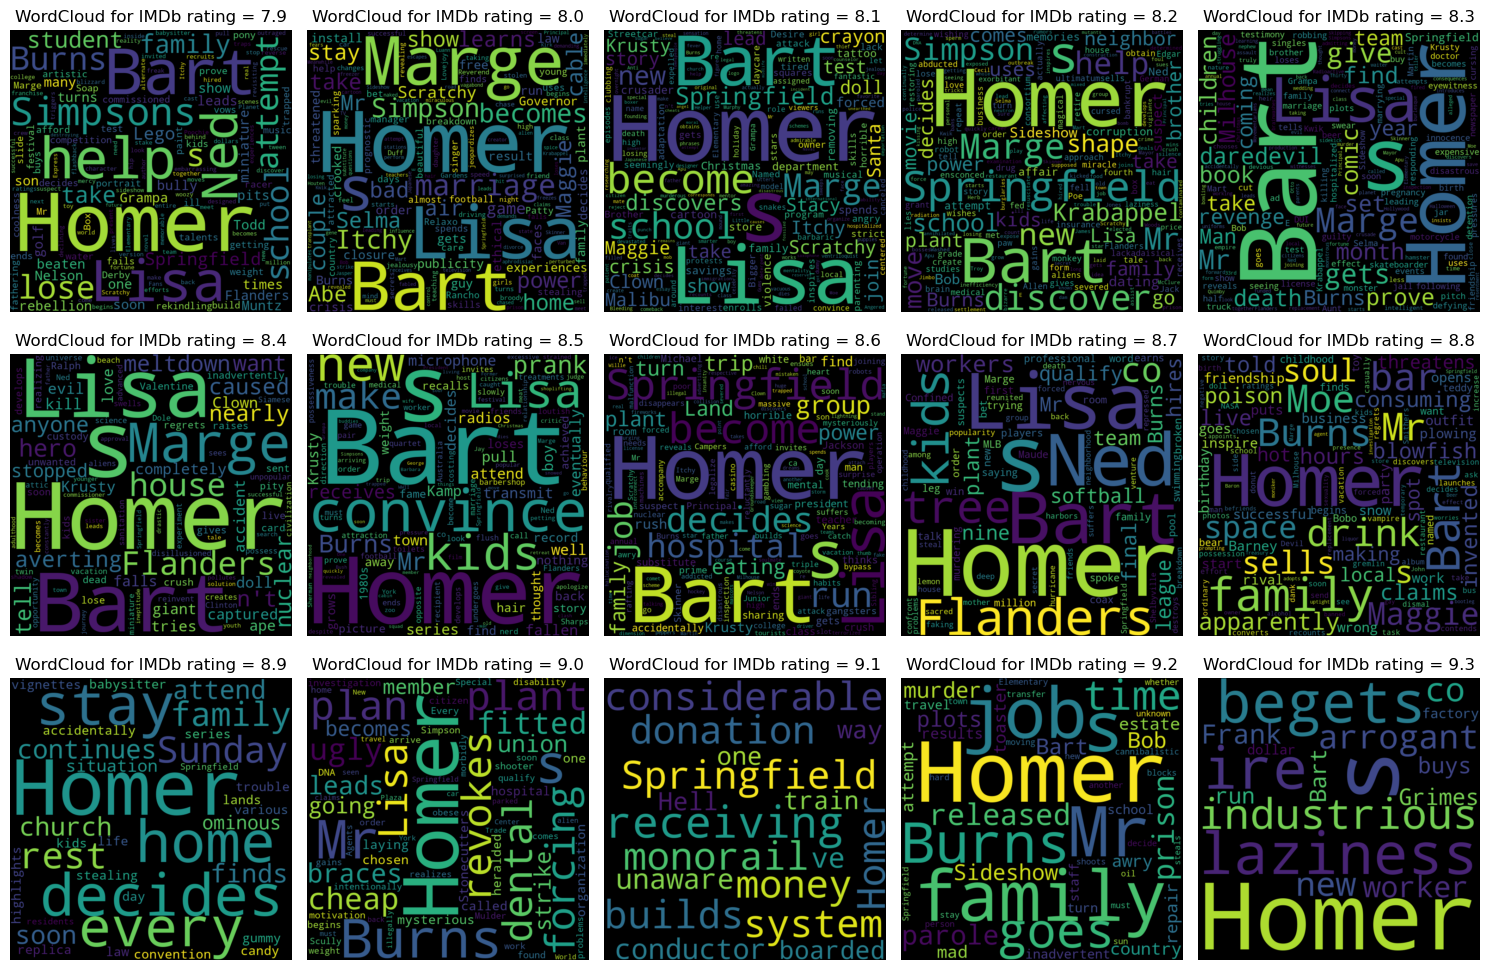

In [158]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()
a = 0
for i in ratings:
    wordcloud = build_word_cloud_rating('imdb_rating', i)
    axes[a].imshow(wordcloud, interpolation="bilinear")
    axes[a].set_title(f"WordCloud for IMDb rating = {i}")
    axes[a].axis("off")
    a += 1
plt.tight_layout()
plt.show()

Let's do the same thing for episodes with high TMDb rating.

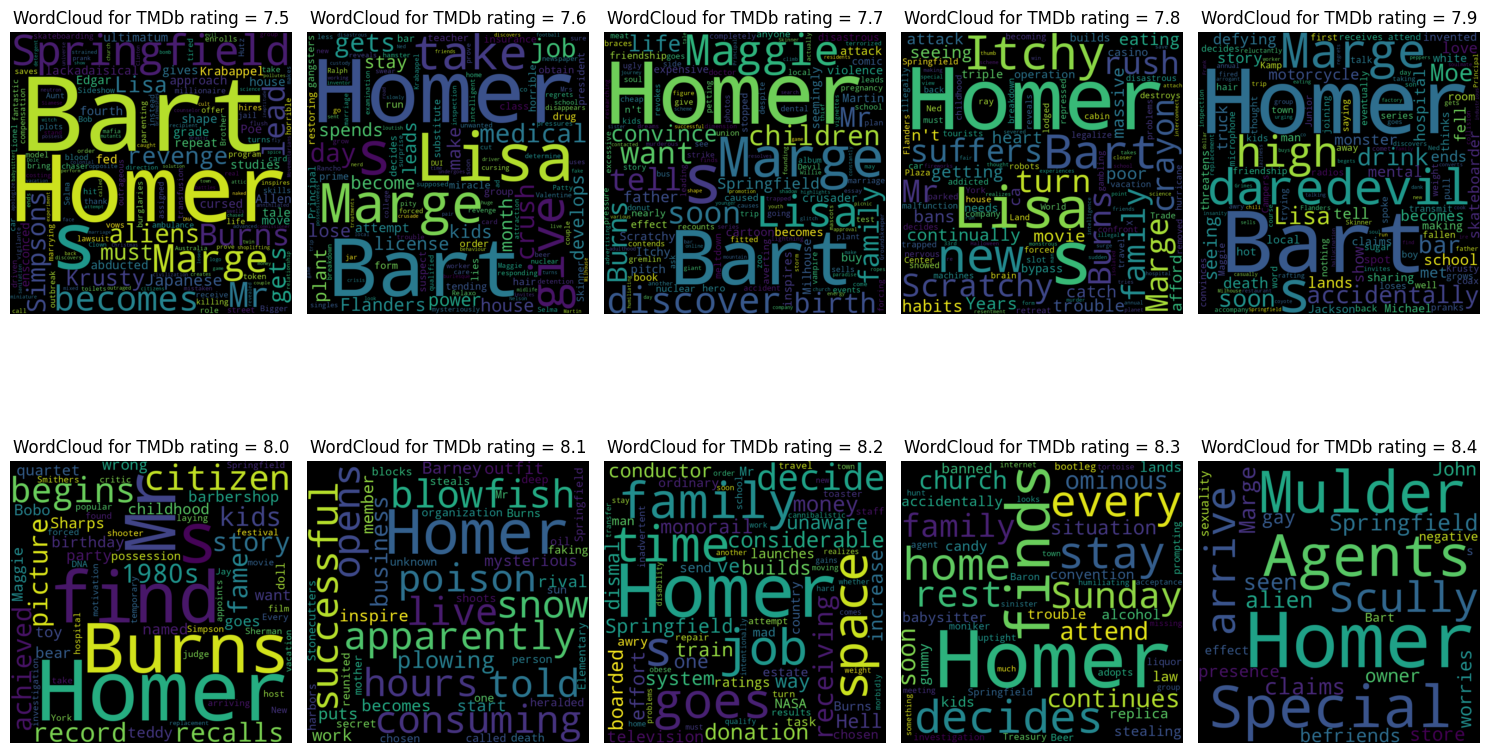

In [94]:
tmdb_ratings = [round(i, 1) for i in np.arange(7.5, 8.4, 0.1).tolist()]

fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()
a = 0
for i in ratings:
    wordcloud = build_word_cloud_tmdb(i)
    axes[a].imshow(wordcloud, interpolation="bilinear")
    axes[a].set_title(f"WordCloud for TMDb rating = {i}")
    axes[a].axis("off")
    a += 1
plt.tight_layout()
plt.show()

As we see, in both cases the key words are characters' names.